# Dog Breed Dataset Exploratory Analysis

This notebook contains basic exploratory analysis of the Stanford Dog Breed Dataset

In [1]:
%matplotlib inline

In [2]:
import os
import scipy as sp
import numpy as np
import pandas as pd

import PIL
import scipy.ndimage as spi

import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
import seaborn as sns

plt.rcParams.update(params)

np.random.seed(42)

In [3]:
# This function prepares a random batch from the dataset
def load_batch(dataset_df, batch_size = 25):
    batch_df = dataset_df.loc[np.random.permutation(np.arange(0,
                                                              len(dataset_df)))[:batch_size],:]
    return batch_df

In [4]:
# This function plots sample images in specified size and in defined grid
def plot_batch(images_df, grid_width, grid_height, im_scale_x, im_scale_y):
    f, ax = plt.subplots(grid_width, grid_height)
    f.set_size_inches(12, 12)
    
    img_idx = 0
    for i in range(0, grid_width):
        for j in range(0, grid_height):
            ax[i][j].axis('off')
            ax[i][j].set_title(images_df.iloc[img_idx]['breed'][:10])
            ax[i][j].imshow(sp.misc.imresize(spi.imread(DATASET_PATH + images_df.iloc[img_idx]['id']+'.jpg'),
                                             (im_scale_x,im_scale_y)))
            img_idx += 1
            
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.25)

## Load Dataset Params

In [9]:
# kaggle에서 데이터를 받아야 함
# https:/​/​www. kaggle.​com/​c/​dog-​breed-​identification/​data
# 파일을 받은 후 특정 디렉토리에 train.zip및 train.csv.zip파일을 압축해제한다.
# 그 디렉토리와 파일을 아래에 기술한다.
DATASET_PATH = r'train/'
LABEL_PATH = r'labels.csv'

In [10]:
dataset_df = pd.read_csv(LABEL_PATH)
dataset_df.shape

(10222, 2)

## Visualize a Sample Set

In [11]:
batch_df = load_batch(dataset_df, 
                    batch_size=36)

/home/dyanos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
/home/dyanos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if sys.path[0] == '':


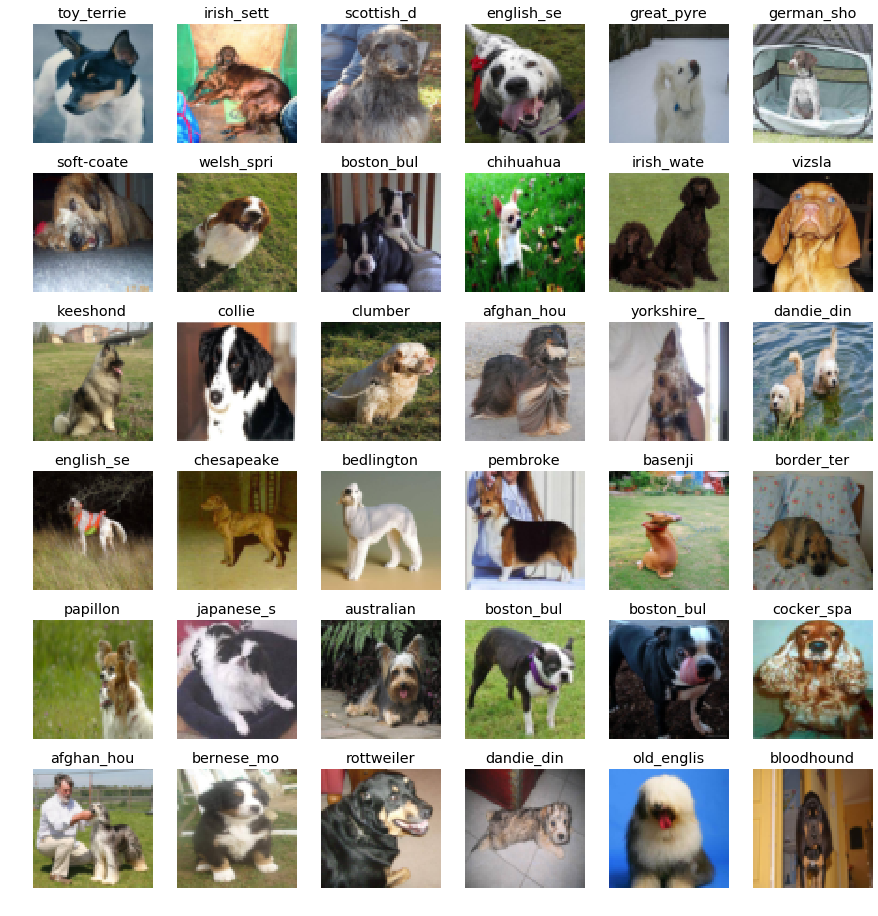

In [12]:
plot_batch(batch_df, grid_width=6, grid_height=6
           ,im_scale_x=64, im_scale_y=64)

## Analyze Image Dimensions

In [15]:
file_list = os.listdir(DATASET_PATH)
file_dimension_list = np.asarray([spi.imread(DATASET_PATH + file).shape for file in file_list])
shape_df = pd.DataFrame(file_dimension_list,columns=['width','height','channel'])

/home/dyanos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


In [16]:
shape_df.describe()

,width,height,channel
count,10222.000000,10222.00000,10222.0
mean,386.747212,443.33154,3.0
std,130.068327,152.42012,0.0
min,102.000000,97.00000,3.0
25%,333.000000,360.00000,3.0
50%,375.000000,500.00000,3.0
75%,452.000000,500.00000,3.0
max,2562.000000,3264.00000,3.0


Observations:
* All images are colored (channel is throughout 3)
* There are some huge images as well _see max for width and height_
* Most images are taller than being wider

### Shape Distribution

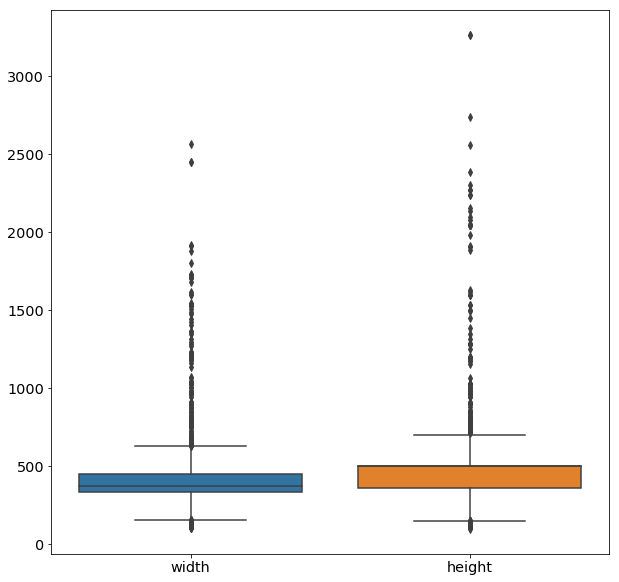

In [17]:
sns.boxplot(orient="v",data=shape_df[['width','height']])

### Scatter Plot

Text(0, 0.5, 'height')

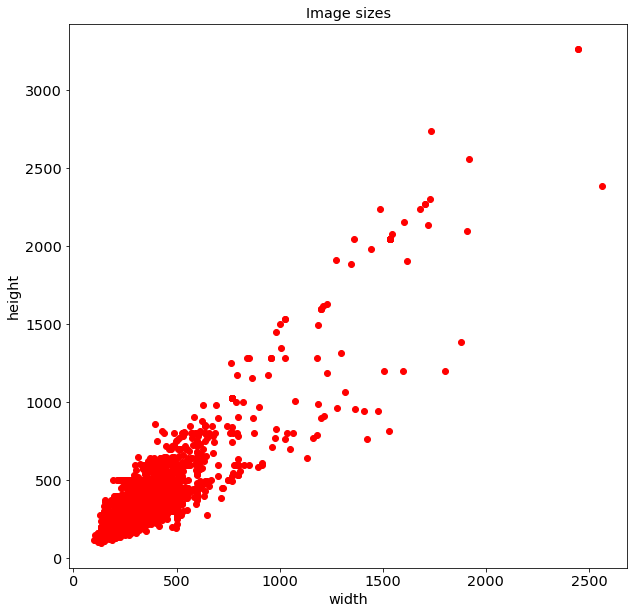

In [18]:
plt.plot(file_dimension_list[:, 0], file_dimension_list[:, 1], "ro")
plt.title("Image sizes")
plt.xlabel("width")
plt.ylabel("height")

Maximum number of images lie within 500x500 size

## Class (Breed) Distribution

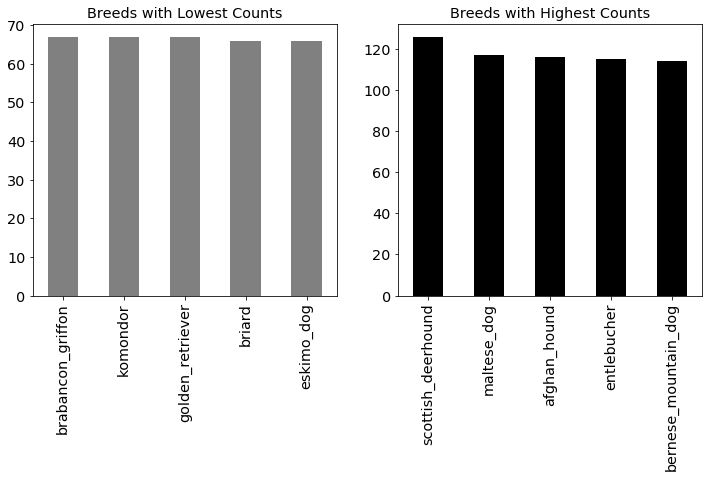

In [19]:
fig = plt.figure(figsize = (12,5))

ax1 = fig.add_subplot(1,2, 1)
dataset_df.breed.value_counts().tail().plot('bar',ax=ax1,color='gray',title="Breeds with Lowest Counts")

ax2 = fig.add_subplot(1,2, 2)
dataset_df.breed.value_counts().head().plot('bar',ax=ax2,color='black',title="Breeds with Highest Counts")

## Understand impact of resizing
Impact of resizing is pretty evident

In [20]:
IMG_INDEX = 100

/home/dyanos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


Text(0.5, 1.0, 'Original Image')

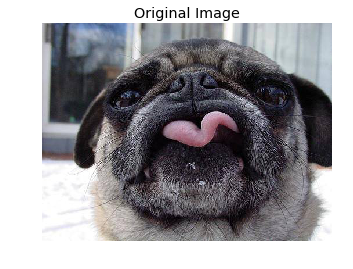

In [21]:
plt.figure(figsize = (10,4))
img = plt.imshow(spi.imread(DATASET_PATH + file_list[IMG_INDEX]))
img.set_cmap('hot')
plt.axis('off')
plt.title("Original Image")

In [22]:
scale_size = [160, 80, 40, 20]

/home/dyanos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dyanos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until


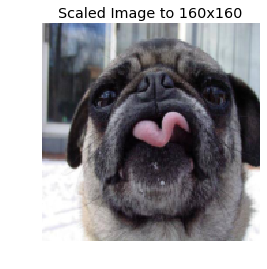

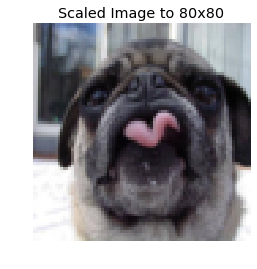

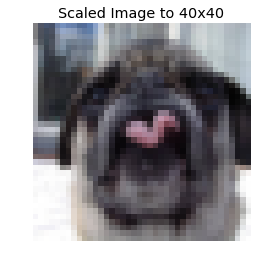

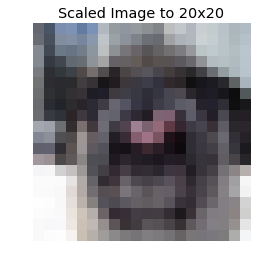

In [23]:
for scaler in scale_size:
    plt.figure(figsize = (10,4))
    img = plt.imshow(sp.misc.imresize(spi.imread(DATASET_PATH + file_list[IMG_INDEX]), (scaler, scaler)))
    img.set_cmap('hot')
    plt.axis('off')
    plt.title("Scaled Image to {}x{}".format(scaler,scaler))
    plt.show()

## Analyze Color Channels

In [24]:
dog_image = spi.imread(DATASET_PATH + file_list[IMG_INDEX])

/home/dyanos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


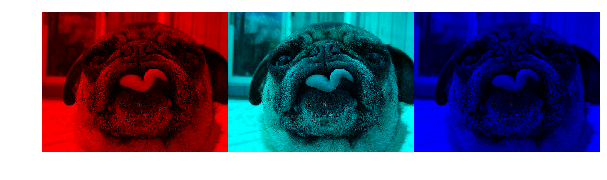

In [25]:
dog_r = dog_image.copy() # Red Channel
dog_r[:,:,1] = dog_r[:,:,2] = 0 # set G,B pixels = 0
dog_g = dog_image.copy() # Green Channel
dog_g[:,:,0] = dog_r[:,:,2] = 0 # set R,B pixels = 0
dog_b = dog_image.copy() # Blue Channel
dog_b[:,:,0] = dog_b[:,:,1] = 0 # set R,G pixels = 0

plot_image = np.concatenate((dog_r, dog_g, dog_b), axis=1)
plt.figure(figsize = (10,4))
plt.set_cmap('hot')
plt.axis('off')
plt.imshow(plot_image)

## Gray Scale Pixel Distribution

In [26]:
from skimage.color import rgb2gray

dog_img_gray = rgb2gray(dog_image)

print('Image shape:', dog_img_gray.shape, '\n')

# 2D pixel map
print('2D image pixel map')
print(np.round(dog_img_gray, 2), '\n')

# flattened pixel feature vector
print('Flattened pixel map:', (np.round(dog_img_gray.flatten(), 2)))

Image shape: (375, 500) 

2D image pixel map
[[0.7  0.7  0.67 ... 0.73 0.73 0.72]
 [0.73 0.72 0.68 ... 0.74 0.73 0.73]
 [0.74 0.72 0.68 ... 0.74 0.74 0.73]
 ...
 [0.97 0.97 0.98 ... 1.   1.   1.  ]
 [0.98 0.98 0.98 ... 1.   1.   1.  ]
 [0.98 0.98 0.98 ... 1.   1.   1.  ]] 

Flattened pixel map: [0.7  0.7  0.67 ... 1.   1.   1.  ]


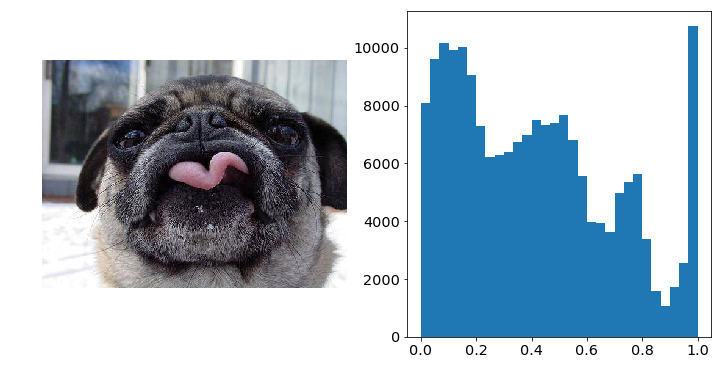

In [27]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(1,2, 1)
plt.set_cmap('hot')
plt.axis('off')
ax1.imshow(dog_image, cmap="gray")
ax2 = fig.add_subplot(1,2, 2)
c_freq, c_bins, c_patches = ax2.hist(dog_img_gray.flatten(), bins=30)

## Edge Detection

/home/dyanos/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


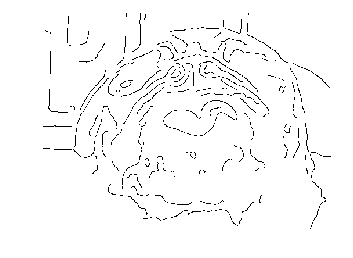

In [28]:
from skimage.feature import canny

dog_edges = canny(dog_img_gray, sigma=3)
fig = plt.figure(figsize = (8,4))
plt.set_cmap('hot')
plt.axis('off')
ax2 = fig.add_subplot(1,1, 1)
ax2.imshow(dog_edges, cmap='binary')

## Deep Learning based Feature Extraction

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as K

### Setup a very basic 2 Layer CNN

In [36]:
model = Sequential()
model.add(Conv2D(4, (4, 4), input_shape=(375, 500, 3), activation='relu', 
                 kernel_initializer='glorot_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(4, (4, 4), activation='relu', 
                kernel_initializer='glorot_uniform'))

### View Model Architecture

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 372, 497, 4)       196       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 186, 248, 4)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 183, 245, 4)       260       
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


### Hooks to extract features from layers

In [38]:
first_conv_layer = K.function([model.layers[0].input, K.learning_phase()], 
                              [model.layers[0].output])
second_conv_layer = K.function([model.layers[0].input, K.learning_phase()], 
                               [model.layers[2].output])

### Extract and Visualize Features

In [39]:
dog_image.shape

(375, 500, 3)

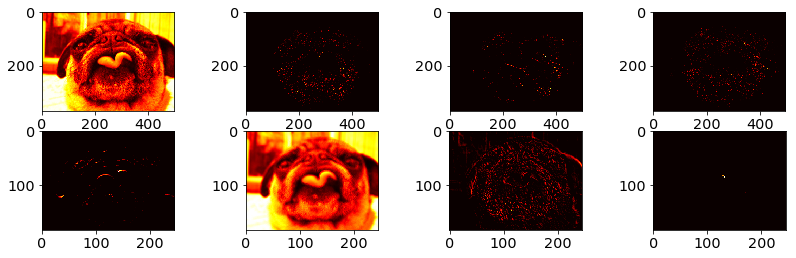

In [40]:
dog_vec = dog_image.reshape(1, 375, 500, 3)

# extract feaures 
first_conv_features = first_conv_layer([dog_vec])[0][0]
second_conv_features = second_conv_layer([dog_vec])[0][0]

# view feature representations
fig = plt.figure(figsize = (14,4))
ax1 = fig.add_subplot(2,4, 1)
ax1.imshow(first_conv_features[:,:,0])
ax2 = fig.add_subplot(2,4, 2)
ax2.imshow(first_conv_features[:,:,1])
ax3 = fig.add_subplot(2,4, 3)
ax3.imshow(first_conv_features[:,:,2])
ax4 = fig.add_subplot(2,4, 4)
ax4.imshow(first_conv_features[:,:,3])

ax5 = fig.add_subplot(2,4, 5)
ax5.imshow(second_conv_features[:,:,0])
ax6 = fig.add_subplot(2,4, 6)
ax6.imshow(second_conv_features[:,:,1])
ax7 = fig.add_subplot(2,4, 7)
ax7.imshow(second_conv_features[:,:,2])
ax8 = fig.add_subplot(2,4, 8)
ax8.imshow(second_conv_features[:,:,3])